In [1]:
from gensim.models import Word2Vec, Doc2Vec
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string, strip_punctuation, strip_numeric, strip_tags
import pandas as pd
import requests
import time
import gensim
import random
import multiprocessing
cores = multiprocessing.cpu_count()


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial


import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# #get unique words and request for concept net:
# #change 2d to 1d
# df = pd.read_csv('aty.csv', index_col=0)
# sentences = [preprocess_string(remove_stopwords(row['QA'])) for ind,row in df.iterrows()]
# sentences += [preprocess_string(remove_stopwords(row['Atypical_Annot2'])) for ind,row in df.iterrows()]
# sentences = [j for sub in sentences for j in sub]
# print(len(sentences))
# #remove duplicates
# sentences = list(dict.fromkeys(sentences))
# print(len(sentences))

# words = sentences
# temp=[]

# concept_sentences=[]
# i=0
# for word in words:
#         print(i)
#         i+=1
# #     print(words)
# #     for word in words:
# #         print(word)
#         try:

#             obj = requests.get('http://api.conceptnet.io/c/en/'+word.lower()).json()
#         #     obj.keys(),len(obj['edges']), obj['edges'][2], obj['edges'][3].keys()
#             for edge in obj['edges']:
#                 try:
#                     if edge['end']['language']!='en' or edge['start']['language']!='en':
#     #                     print(edge['end']['language'], edge['start']['language'])
#                         continue
#                     else:

#                         if edge['surfaceText']:
#                             edge['surfaceText'] = edge['surfaceText'].replace('[','')
#                             edge['surfaceText'] = edge['surfaceText'].replace(']','')
#                             concept_sentences.append(edge['surfaceText'])
#                         else:
#                             concept_sentences.append(edge['start']['label'] +' '+ edge['rel']['label'] +' '+ edge['end']['label'])

#                 except:
#                     pass
#                     ###just includes ExternalURL
#     #                 if edge['surfaceText']:
#     #                     print(edge['surfaceText'])
#     #                 else:
#     #                     print(edge['start']['label'], edge['rel']['label'],"_________", edge['end']['label'])

#     #         print("_______")
#     #     break

#         except:
#             temp.append(word)
#             print(word)
#             print("sleeping")
#             time.sleep(1)

            


In [39]:
# # define training data
# df = pd.read_csv('aty.csv', index_col=0)
# sentences = [preprocess_string(remove_stopwords(row['QA'])) for ind,row in df.iterrows()]
# sentences += [preprocess_string(remove_stopwords(row['Atypical_Annot2'])) for ind,row in df.iterrows()]
# with open('concept_sentences.txt', 'r') as x:
#     concept_sentences = x.readlines()
# sentences += concept_sentences

# print('train model:')
# # train model
# model = Word2Vec(sentences, min_count=1, window=10, sg=1)
# # summarize the loaded model
# print(model)
# # summarize vocabulary
# # words = list(model.wv.vocab)
# # print(words)
# # access vector for one word
# # print(model['sentence'])
# # # save model
# # model.save('model.bin')
# # # load model
# # new_model = Word2Vec.load('model.bin')
# # print(new_model)
# model.wv.most_similar('oreo')


In [73]:
spatial.distance.cosine(wv['vodka'], wv['absolut'])
# spatial.distance.cosine(wv['vodka'], w2v.wv.word_vec('vodka'))
# type(wv['vodka']), type( w2v.wv.word_vec('vodka')),  w2v.wv.word_vec('vodka').shape, wv['vodka'].shape

0.7085064053535461

# distance learning

In [8]:
word = 'vodka'
# print(wv.wv.most_similar(word))
# type(wv), type(w2v)
concept = [key for key , score in (wv.most_similar(word, topn=100))]
meta = [key for key , score in (w2v.wv.most_similar(word, topn=100))]
# print(meta)
# print(concept)
distances=[]
d1s=[]
d2s=[]
keys=[]

for key,d1 in w2v.wv.most_similar(word, topn=100):#meta
    try:
        d2 = spatial.distance.cosine(wv[word], wv[key])
    except:
        pass
    distances.append({'key':key, 'meta':d1, 'concept':d2})
    d1s.append(d1)
    d2s.append(d2)
    keys.append(key)

    
    
# distances = sorted(distances, key=lambda k: k['key']) 
# distances
dis = pd.DataFrame(data={'key':keys, 'concept_distance':d2s, 'meta_similarity':d1s})
dis

,key,concept_distance,meta_similarity
0,absolut,0.708506,0.988252
1,absolute,0.908182,0.949760
2,skyy,0.908182,0.943168
3,book,0.914364,0.922557
4,perfection,0.942913,0.917674
...,...,...,...
95,wild,0.845138,0.820043
96,distinctive,0.878358,0.819818
97,communicator,0.987736,0.819806
98,open,0.993909,0.819635


In [24]:
dis.describe()

,concept_distance,meta_similarity
count,100.000000,100.000000
mean,0.863382,0.952093
std,0.130206,0.006714
min,0.477805,0.945970
25%,0.775323,0.947210
50%,0.910030,0.950473
75%,0.950491,0.954611
max,1.058692,0.981365


array([[<AxesSubplot:title={'center':'concept_distance'}>,
        <AxesSubplot:title={'center':'meta_similarity'}>]], dtype=object)

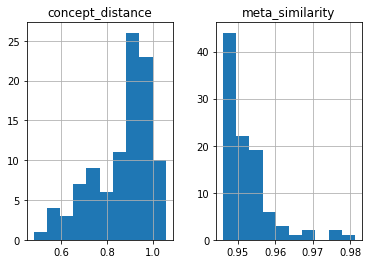

In [26]:
#trained just on aty:
dis.hist()
#کلمات به هم نزدیک هستند چون یک جا ترین شدند
# اما در واقعیت از هم دور هستند و این فاصله 1 هست. یعنی خیلی دورند.

array([[<AxesSubplot:title={'center':'concept_distance'}>,
        <AxesSubplot:title={'center':'meta_similarity'}>]], dtype=object)

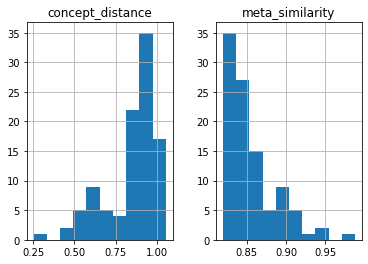

In [9]:
# trained on aty + qa + concept 
dis.hist()


In [107]:
wv['person','head'].shape

(2, 300)

In [100]:
w1='person'
w2='twisted'

w1='tornado'
w2='head'
spatial.distance.cosine(d2v.infer_vector([w1]), d2v.infer_vector(preprocess_string("", CUSTOM_FILTERS)))
# CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, strip_punctuation, remove_stopwords]



1.02347612939775

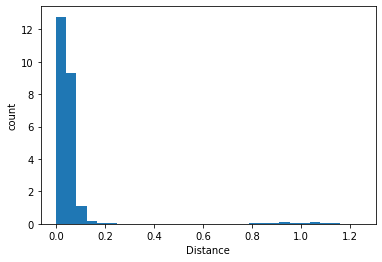

In [105]:
dd=[]
for ind,row in df.iterrows():
    if row['obj2']!='':
#         dd.append(spatial.distance.cosine(d2v.infer_vector(row['obj1'].split()), d2v.infer_vector(row['obj2'].split())))
        dd.append(spatial.distance.cosine(d2v.infer_vector(row['obj1'].split()), d2v.infer_vector(row['obj2'].split())))

plt.hist(dd, density=True, bins=30)  # density=False would make counts
plt.ylabel('count')
plt.xlabel('Distance');

In [91]:
df

,Id,QA,Atypical_Annot,Aty,method,obj1,obj2,Atypical_Annot2
0,110991.jpg,I should eat Oreos because I can snack on Oreo...,Liquid Deformed Object: The liquid which has b...,milk,Liquid Deformed Object,milk,,Liquid Deformed Object: The liquid which has b...
1,110991.jpg,I should eat Oreos because I can snack on Oreo...,Liquid Deformed Object: The liquid which has b...,milk,Liquid Deformed Object,milk,,Liquid Deformed Object: The liquid which has b...
2,110991.jpg,I should eat Oreos because I can snack on Oreo...,Object Replacement: The object which is placed...,cookie milk person body hoopnet,Object Replacement,cookie- milk,person- body- hoop/net,Object Replacement: The object which is placed...
3,110991.jpg,I should eat Oreo's because Oreo fun to dunk O...,Liquid Deformed Object: The liquid which has b...,milk,Liquid Deformed Object,milk,,Liquid Deformed Object: The liquid which has b...
4,110991.jpg,I should eat Oreo's because Oreo fun to dunk O...,Liquid Deformed Object: The liquid which has b...,milk,Liquid Deformed Object,milk,,Liquid Deformed Object: The liquid which has b...
...,...,...,...,...,...,...,...,...
14202,102221.jpg,I should buy Oreo cookies because Oreo cookies...,Object Replacement: The object which is placed...,oreo persons head,Object Replacement,oreo,person's head,Object Replacement: The object which is placed...
14203,102221.jpg,I should buy oreo cookies because when you eat...,Object with Missing Part: The objects which ha...,person,Object with Missing Part,person,,Object with Missing Part: The objects which ha...
14204,102221.jpg,I should buy oreo cookies because when you eat...,Solid Deformed Object: The objects that have b...,a persons body tornado,Solid Deformed Object,a persons body,tornado,Solid Deformed Object: The objects that have b...
14205,102221.jpg,I should buy oreo cookies because when you eat...,Solid Deformed Object: The objects that have b...,person twisted,Solid Deformed Object,person,twisted,Solid Deformed Object: The objects that have b...


# create sentences

In [2]:
#load data
df = pd.read_csv('aty.csv', index_col=0)
df = df.fillna('')
# sentences = [preprocess_string(remove_stopwords(row['QA'])) for ind,row in df.iterrows()]
# sentences += [preprocess_string(remove_stopwords(row['Atypical_Annot2'])) for ind,row in df.iterrows()]qa

CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, strip_punctuation, remove_stopwords]
# preprocess_string(s, CUSTOM_FILTERS)

qa = [(preprocess_string((row['QA']), CUSTOM_FILTERS)) for ind,row in df.iterrows()]
aty = [preprocess_string(row['Atypical_Annot2'], CUSTOM_FILTERS) for ind,row in df.iterrows()]
with open('concept_sentences.txt', 'r') as x:
    concept_sentences = [preprocess_string(line.replace('\n',''), CUSTOM_FILTERS) for line in x.readlines()]

print(len(qa), len(aty), len(concept_sentences))
print(qa[0], aty[0], concept_sentences[0])

sentences = qa + aty + concept_sentences
# sentences =aty
# sentences = qa
print(len(sentences), type(sentences))
sentences = [list(t) for t in set(tuple(element) for element in sentences)]
print(len(sentences))

print((sentences[0], sentences[-1]))
random.shuffle(sentences)
print((sentences[0], sentences[-1]))




14207 14207 24159
['eat', 'oreos', 'snack', 'oreos', 'basketball', 'game'] ['liquid', 'deformed', 'object', 'liquid', 'deformed', 'milk'] ['want', 'diminish', 'hunger', 'eat']
52573 <class 'list'>
32601
(['tub', 'taking', 'bath'], ['mac', 'hascontext', 'irish', 'scottish', 'patronymic', 'surnames'])
(['object', 'missing', 'objects', 'missing', 'parts', 'audi'], ['car', 'related', 'vehicle'])


In [46]:
len(sentences), len(qa), len(df)

(32601, 14207, 14207)

# wv / w2v / d2v

In [3]:
# model = gensim.models.KeyedVectors.load_word2vec_format("word2vec-google-news-300",binary=True)
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

vec_king = wv['king']


In [148]:
# len(wv.vocab)

In [4]:
print('train model:')
# train model


model = Word2Vec(sentences, vector_size=300, min_count=1, window=10, sg=1)
# summarize the loaded model
print(model)
# summarize vocabulary
# words = list(model.wv.vocab)
# print(words)
# access vector for one word
# print(model['sentence'])
# # save model
# model.save('word2vec_19_9_2021.bin')
# # load model
# new_model = Word2Vec.load('model.bin')
# print(new_model)
for word in ['vodka', 'phone','car','drink','smoke','motor', 'cookie']:
    print(model.wv.most_similar(word), '___________')
    
w2v = model

train model:
Word2Vec(vocab=15875, vector_size=300, alpha=0.025)
[('absolut', 0.9895743131637573), ('perfection', 0.9407933354377747), ('absolute', 0.9314635992050171), ('skyy', 0.91691654920578), ('book', 0.9149103164672852), ('alcohol', 0.901119589805603), ('mango', 0.8935227394104004), ('stirring', 0.8908925652503967), ('welcomed', 0.8884954452514648), ('sophisticated', 0.8883627653121948)] ___________
[('music', 0.9225020408630371), ('mobile', 0.9211404323577881), ('cell', 0.9209356307983398), ('tv', 0.8732327222824097), ('phones', 0.8639460802078247), ('sony', 0.8538764119148254), ('sound', 0.8523532748222351), ('nokia', 0.8496147394180298), ('laptop', 0.8490293622016907), ('walkman', 0.8488283753395081)] ___________
[('audi', 0.9588844776153564), ('cars', 0.9142901301383972), ('volkswagen', 0.8721627593040466), ('truck', 0.8673475384712219), ('model', 0.8470839858055115), ('drive', 0.845206618309021), ('handle', 0.8444162011146545), ('interior', 0.8440822958946228), ('race', 0.84

In [5]:

def get_corpus(sentences):
    docs=[]
    for i, sen in enumerate(sentences):
        docs.append(gensim.models.doc2vec.TaggedDocument(sen, [i]))
    return docs

train_corpus = get_corpus(sentences)#[:int(0.8*len(docs))])
# test_corpus = get_corpus(sentences[int(0.8*len(docs)):])
print(train_corpus[:2])


model = gensim.models.doc2vec.Doc2Vec(dm=1, vector_size=300, negative=5, hs=0, min_count=1, sample = 0, workers=cores)
model.build_vocab(train_corpus)
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)
# vector = model.infer_vector(['only', 'you', 'can', 'prevent', 'forest', 'fires'])
# model.init_sims()
d2v = model
# print(vector)

[TaggedDocument(words=['object', 'missing', 'objects', 'missing', 'parts', 'audi'], tags=[0]), TaggedDocument(words=['recording', 'somethign', 'requires', 'tape'], tags=[1])]


In [147]:
# test?

ranks = []
second_ranks = []
for doc_id in range(len(train_corpus)):
    inferred_vector = d2v.infer_vector(train_corpus[doc_id].words)
    sims = d2v.docvecs.most_similar([inferred_vector], topn=len(d2v.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])
    break
    
    
import collections

counter = collections.Counter(ranks)
print(counter)

print('Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % d2v)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))
    
    
# Pick a random document from the corpus and infer a vector from the model
import random
doc_id = random.randint(0, len(train_corpus) - 1)

# Compare and print the second-most-similar document
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(train_corpus[sim_id[0]].words)))

Counter({1706: 1})
Document (0): «likely baggage trunk airport»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d300,n5,w5,t12):

MOST (3946, 0.9345085024833679): «nailhead type knob»

SECOND-MOST (12439, 0.930212676525116): «musket ball related musket»

MEDIAN (16861, 0.4767744541168213): «buy porche porche european»

LEAST (12507, -0.7758105993270874): «jeep etymologicallyrelatedto gp»

Train Document (26886): «happen listen hear things»



/home/m_eslami/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  import sys


IndexError: list index out of range

In [174]:
i=100
i=1000
sen = preprocess_string((df.iloc[i]['QA']), CUSTOM_FILTERS)
print(sen, '--------',df.iloc[i]['obj1'], '_______', df.iloc[i]['obj2'])

inferred_vector = d2v.infer_vector(sen)
sims = d2v.docvecs.most_similar([inferred_vector], topn=len(d2v.docvecs))
id = sims[0][0]
d2v.wv.index_to_key[2]
for id, score in sims[:10]:
    print(sentences[id], score)
    print(id)
    
    print(df.iloc[id]['obj1'],'________', df.iloc[id]['obj2'])
    
'''
طبق کد بالا من هم میتونم بین یک عبارت و ابجکتش ارتباط برقرار کنم
(QA, obj1, +1)
(QA, obj2, +1)
هم میتونم جملات شبیه اش رو پیدا کنم و با ابجکت اونها هم ارتباط برقرار کنم. شاید منجر به جنرال شدن و تعمیم بهتر بشه.
مثلا در اینجا خودرنی ها در این مفاهیم قابل نمایش بودند.
'''
# sentences[21301]

['buy', 'nissan', 'leaf', 'nissan', 'leaf', 'eco', 'friendly'] -------- leaf- road map _______ 
['look', 'different', 'car', 'model', 'bmw', 'appealing', 'efficient', 'cars'] 0.9740368127822876
890
snake- spine ________ 
['buy', 'audi', 'r8', 'v10', 'plus', 'audi', 'r8', 'v10', 's', 'fast', 'car'] 0.9739524722099304
7105
water ________ 
['buy', 'audi', 'car', 'audi', 'car', 'joy'] 0.9658578038215637
1216
twitter post- facebook post ________ 
['increase', 'distance', 'car', 'infront', 'car', 'infront', 'safe'] 0.9612246155738831
7459
sand ________ buffalo
['auto', 'insurance', 'need', 'hit', 'hitler', 'car'] 0.957726776599884
345
dog- turkey ________ 
['buy', 'toyota', 'corolla', 'toyota', 'corolla', 'environmentally', 'friendly', 'car'] 0.9576006531715393
2473
soft drink containers ________ 
['buy', 'toyota', 'yaris', 'toyota', 'yaris', 'provides', 'big', 'value', 'small', 'car'] 0.9559458494186401
5547
money signs ________ hourglass
['buy', 'ford', 'ranger', 'ford', 'ranger', 'ford', 

/home/m_eslami/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  import sys


'\nطبق کد بالا من هم میتونم بین یک عبارت و ابجکتش ارتباط برقرار کنم\n(QA, obj1, +1)\n(QA, obj2, +1)\nهم میتونم جملات شبیه اش رو پیدا کنم و با ابجکت اونها هم ارتباط برقرار کنم. شاید منجر به جنرال شدن و تعمیم بهتر بشه.\nمثلا در اینجا خودرنی ها در این مفاهیم قابل نمایش بودند.\n'

In [ ]:
i=10036
# using w2v+sum or d2v ?????
pop=[]
keys=[]
score=[]
temp=np.zeros(300,)
print(preprocess_string((df.iloc[i]['QA']), CUSTOM_FILTERS))
for word in preprocess_string((df.iloc[i]['QA']), CUSTOM_FILTERS):
    try:
        temp += (w2v.wv[word])
    except:
#             print('error', word)
#             temp +=(np.zeros(300,))
        pass
# w2v.wv.most_similar(temp, topn=50)


for row in  w2v.wv.most_similar([temp], topn=20):
    
    # remove ORG
    doc = nlp(row[0])
    if([(X.text, X.label_) for X in doc.ents]):
        if([(X.text, X.label_) for X in doc.ents][0][1]=='ORG'):
            print(row[0])
            continue
            
    if len(row[0])<3:
        continue

    try:
        #normalized:
        pop.append(wv.key_to_index[row[0]]/3000000)
        keys.append(row[0])
        score.append(row[1])
    except:
#         pop.append(np.inf)
        pass

        
# for row in  w2v.wv.most_similar(negative=[word]):
#     keys.append(row[0])
#     score.append(row[1])
#     try:
#         pop.append(wv.key_to_index[row[0]])
#     except:
#         pop.append(np.inf)


concept = pd.DataFrame(data={'word':keys, 'sim_score':score, 'popularity':pop})
# weighted:
concept['score']=10*concept['sim_score']+ concept['popularity']
concept.sort_values('score',ascending=False)

In [34]:
# # doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
# # print([(X.text, X.label_) for X in doc.ents])

# for ind,row in concept.iterrows():
#     print(row['word'])
#     doc = (nlp(row['word']))
#     print([(X.text, X.label_) for X in doc.ents])


doc = nlp('bmw')
if([(X.text, X.label_) for X in doc.ents][0][1]=='ORG')


True



In [198]:
sentences[sims[0][0]],'a', sims[0][1]

(['buy', 'bmw', 'bmw', 'great', 'car', 'city'], 'a', 0.8754941821098328)

In [203]:
# using w2v sum or d2v ?????
pop=[]
keys=[]
score=[]

inferred_vector = d2v.infer_vector(sen)
sims = d2v.docvecs.most_similar([inferred_vector], topn=(20))

for row in  sims:
        #normalized:
#         pop.append(wv.key_to_index[row[0]]/3000000)
    pop.append(0)
    keys.append(sentences[row[0]])
    score.append(row[1])
        
# for row in  w2v.wv.most_similar(negative=[word]):
#     keys.append(row[0])
#     score.append(row[1])
#     try:
#         pop.append(wv.key_to_index[row[0]])
#     except:
#         pop.append(np.inf)


concept = pd.DataFrame(data={'word':keys, 'sim_score':score})
# weighted:
# concept['score']=10*concept['sim_score']+ concept['popularity']
# concept.sort_values('sim_score',ascending=False)
concept

/home/m_eslami/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  import sys


,word,sim_score
0,"[volkswagen, brand, car]",0.850395
1,"[drive, audi, car, 13, car, evolved, high, per...",0.843452
2,"[buy, bmw, bmw, great, car, city]",0.839065
3,"[ford, brand, car]",0.838813
4,"[volvo, isa, car]",0.823182
5,"[subaru, isa, japanese, car]",0.815363
6,"[buy, ford, vehicle, becausethis, car, future]",0.815127
7,"[rover, isa, car]",0.811882
8,"[buy, kia, car, kia, car, place]",0.804453
9,"[drive, nissan, leaf, nissan, leaf, s, economi...",0.801941


In [ ]:
#create + and - data:


In [7]:

def get_corpus(sentences):
    docs=[]
    for i, sen in enumerate(sentences):
        docs.append(gensim.models.doc2vec.TaggedDocument(sen, [i]))
    return docs

train_corpus = get_corpus(qa)#[:int(0.8*len(docs))])
model = gensim.models.doc2vec.Doc2Vec(dm=1, vector_size=300, negative=5, hs=0, min_count=1, sample = 0, workers=cores)
model.build_vocab(train_corpus)
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)
d2v_qa = model


'''
باید دیتا اگمنتیشن کنم
اسم شرکت ها رو با ان ای آر حذف کنم
و به جاش با کانسپت نت پر کنم
هم اسم نمیده هم دیتا زیاد میشه هم از دیتا کانسپ نت در داک تو وک استفاده میشه.


خود لیبل های اصلی obj1
باید وزن بیشتری نسبت به تولید شده های مشابه از طریق w2v
داشته باشند.
'''


In [56]:
# temp = 'lips-butter fly'.replace('-', ' ')
# temp = 'lips-butter fly'.replace('-',' ').split(' ')
# # wv.most_similar(positive=temp)
# temp

temp = 'lip'
temp = temp.replace('-',' ').split(' ')
print('this is temp', temp)
#         temp = 'lips-butterfly'.split('-')
similars = (w2v.wv.most_similar(positive=temp, topn=5))
similars

this is temp ['lip']


[('target', 0.9840919971466064),
 ('lighter', 0.9832872748374939),
 ('waste', 0.9829930663108826),
 ('trophy', 0.9822179079055786),
 ('chip', 0.9814481735229492)]

In [13]:
def get_w2v_neighbours(temp):
    pop=[]
    keys=[]
    score=[]
    similars=[]
    try:
        temp = temp.replace('-',' ').split(' ')
#         print('this is temp', temp)
#         temp = 'lips-butterfly'.split('-')
        similars = (w2v.wv.most_similar(positive=temp[0], topn=5))
    except:
        pass
        
        
    for row in  similars:
        try:
            #normalized:
            pop.append(wv.key_to_index[row[0]]/3000000)
            keys.append(row[0])
            score.append(row[1])
        except:
    #         pop.append(np.inf)
            pass


    # for row in  w2v.wv.most_similar(negative=[word]):
    #     keys.append(row[0])
    #     score.append(row[1])
    #     try:
    #         pop.append(wv.key_to_index[row[0]])
    #     except:
    #         pop.append(np.inf)


    concept = pd.DataFrame(data={'word':keys, 'sim_score':score, 'popularity':pop})
    # weighted:
    concept['score']=2*concept['sim_score']+ concept['popularity']
    concept.sort_values('score',ascending=False)
#     return concept
    return concept['word']

# get_w2v_neighbours('milk')
for n in get_w2v_neighbours('soccer player and eagle wings'):
    print(n)

player
feet
basketball
football
wearing


In [14]:
'''
خروجی این قسمت رو هم اضافه کنم. کلمات شبیه رو میده:
# using w2v+sum or d2v ?????

***
حتی میشه obj1 
از این کلمات باشه و ابجکت دوم از کلمات دوری که در اینجا تولید شده.
'''

def get_aty_pairs(df):
    zero_df = pd.DataFrame(columns=['QA','obj','label'])


    for ind, row in df[1000:1001].iterrows():

        # finded nearest cases
        sen = preprocess_string((row['QA']), CUSTOM_FILTERS)
        print(sen, '--------',row['obj1'], '_______', row['obj2'])


        inferred_vector = d2v_qa.infer_vector(sen)
        sims = d2v_qa.docvecs.most_similar([inferred_vector], topn=(3))
        id = sims[0][0]
    #     d2v_qa.wv.index_to_key[2]
        for id, score in sims:
            print(qa[id], score)
#             print(id)

    #         print(({'QA':row['QA'], 'obj1':df.iloc[id]['obj1'], 'obj2':df.iloc[id]['obj2'],'label':1}))
            if df.iloc[id]['obj1']: # not NAN
                zero_df = zero_df.append({'QA':row['QA'],'QA2':df.iloc[id]['QA'], 'obj':df.iloc[id]['obj1'], 'label':1}
                           ,ignore_index=True)
            if df.iloc[id]['obj2']:
                zero_df = zero_df.append({'QA':row['QA'],'QA2':df.iloc[id]['QA'], 'obj':df.iloc[id]['obj2'], 'label':1}
                           ,ignore_index=True)




            for nei in get_w2v_neighbours(df.iloc[id]['obj1']):
                zero_df = zero_df.append({'QA':row['QA'],'QA2':df.iloc[id]['QA'], 'obj':nei, 'label':1}
                           ,ignore_index=True)    
            for nei in get_w2v_neighbours(df.iloc[id]['obj2']):
                zero_df = zero_df.append({'QA':row['QA'],'QA2':df.iloc[id]['QA'], 'obj':nei, 'label':1}
                           ,ignore_index=True)



    #         print(df.iloc[id]['obj1'],'________', df.iloc[id]['obj2'])
    #         print("________________________________")





        break
    zero_df.drop('QA2', axis=1, inplace=True)
    zero_df.drop_duplicates(inplace=True)

    return zero_df


zero_df = get_aty_pairs(df)
zero_df

['buy', 'nissan', 'leaf', 'nissan', 'leaf', 'eco', 'friendly'] -------- leaf- road map _______ 
['buy', 'nissan', 'quest', 'cars', 'quest', 'car'] 0.9145126938819885
['buy', 'nissan', 'leaf', 'nissan', 'leaf', 'eco', 'friendly'] 0.9092821478843689


/home/m_eslami/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).


['buy', 'car', 'pretigeous', 'men', 'pretigeous', 'men'] 0.9028110504150391


,QA,obj,label
0,I should buy a Nissan Leaf because the Nissan ...,chairs,1
1,I should buy a Nissan Leaf because the Nissan ...,cars,1
2,I should buy a Nissan Leaf because the Nissan ...,cameras,1
3,I should buy a Nissan Leaf because the Nissan ...,suit,1
4,I should buy a Nissan Leaf because the Nissan ...,artery,1
5,I should buy a Nissan Leaf because the Nissan ...,roots,1
6,I should buy a Nissan Leaf because the Nissan ...,ornament,1
7,I should buy a Nissan Leaf because the Nissan ...,engine,1
8,I should buy a Nissan Leaf because the Nissan ...,motorcycle,1
9,I should buy a Nissan Leaf because the Nissan ...,interior,1


In [58]:
for word in zero_df[:50]['obj']:
    doc = nlp(word)
    if [(X.text, X.label_) for X in doc.ents]:
#         print(word)
        print([(X.text, X.label_) for X in doc.ents])
    
# zero_df.iloc[50]

[('mouse', 'PERSON')]
[('mouse', 'PERSON')]
[('mouse', 'PERSON')]
[('mouse', 'PERSON')]
[('mouse', 'PERSON')]
[('mouse', 'PERSON')]
[('mouse', 'PERSON')]
[('mouse', 'PERSON')]
[('mouse', 'PERSON')]


In [87]:
x =[]
for sen in sentences:
    x.append(model.infer_vector(sen))


In [77]:
test_corpus[0], train_corpus[0], test_corpus[doc_id].words

(TaggedDocument(words=['draft', 'synonym', 'gulp'], tags=[0]),
 TaggedDocument(words=['carniv', 'fun', 'mayb', 'win', 'prize'], tags=[0]),
 ['getter', 'synonym', 'accessor'])

In [164]:
train_corpus

[TaggedDocument(words=['sea', 'relat', 'water', 'bodi'], tags=[0]),
 TaggedDocument(words=['slower', 'formof', 'slower'], tags=[1]),
 TaggedDocument(words=['marga', 'relatedto', 'danc'], tags=[2]),
 TaggedDocument(words=['sure', 'us', 'condom', 'have', 'sex', 'safeti', 'come', 'bareback', 'sex'], tags=[3]),
 TaggedDocument(words=['wai', 'type', 'artifact'], tags=[4]),
 TaggedDocument(words=['tropic', 'relatedto', 'tropism'], tags=[5]),
 TaggedDocument(words=['bui', 'pringl', 'real', 'wool'], tags=[6]),
 TaggedDocument(words=['daddi', 'synonym', 'papa'], tags=[7]),
 TaggedDocument(words=['need', 'eat', 'dinner', 'cook'], tags=[8]),
 TaggedDocument(words=['textur', 'replac', 'object', 'new', 'textur', 'appl', 'logo', 'new', 'textur', 'big', 'mac'], tags=[9]),
 TaggedDocument(words=['us', 'toothbrush', 'clean', 'teeth'], tags=[10]),
 TaggedDocument(words=['drink', 'pepsi', 'pepsi', 'fun'], tags=[11]),
 TaggedDocument(words=['look', 'sprint', 'servic', 'coverag', 'suppos', 'good'], tags=[1

In [ ]:
# Pick a random document from the test corpus and infer a vector from the model
# doc_id = random.randint(0, len(test_corpus) - 1)
# inferred_vector = model.infer_vector(test_corpus[doc_id].words)
inferred_vector = d2v.infer_vector(['I','like','beer','because'])
inferred_vector = d2v.infer_vector(['honey'])
print("*****", inferred_vector.shape)
sims = d2v.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))

# Compare and print the most/median/least similar documents from the train corpus
# print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(test_corpus[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % d2v)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))
print("____________________________")
print(w2v.wv.most_similar('beer'))


# هدف پیدا کردن کلماتی هست که تو داده های فاین تیون شده فاصله ی کم دارند اما در مدل های پری ترین فاصله ی زیاد دارند. 
# در قسمت word2vec
# انقدر دو مدل w2v, d2v باید پخته بشن که خروجی مطلوب بهمون نزدیک بشه

# Deep Model

In [26]:
y1 = []
y2 = []
x =[]
# dooooo this:
# preprocess_string((row['QA']), CUSTOM_FILTERS)
for ind,row in df.iterrows():
#     print(row['QA'], row['obj1'], row['obj2'])
    x.append((d2v.infer_vector(row['QA'].split())))
    y1.append(d2v.infer_vector(row['obj1'].split()))
    y2.append(d2v.infer_vector(row['obj2'].split()))
    
x = np.array(x)
y1 = np.array(y1)
y2 = np.array(y2)
print(x.shape, y1.shape, y2.shape, type(x), type(y1), type(y2))


(14207, 100) (14207, 100) (14207, 100) <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [180]:
w2v.wv['milk'].shape, np.zeros(100,).shape, preprocess_string((row['QA']), CUSTOM_FILTERS)

((300,), (100,), ['money', 'audi', 'makes', 'great', 'cars'])

In [5]:
y1 = []
y2 = []
x =[]

for ind,row in df.iterrows():
#     x.append((d2v.infer_vector(preprocess_string((row['QA']), CUSTOM_FILTERS))))

    temp=np.zeros(300,)
    for word in preprocess_string((row['QA']), CUSTOM_FILTERS):
        try:
            temp += (w2v.wv[word])
        except:
#             print('error', word)
#             temp +=(np.zeros(300,))
            pass
    x.append(temp)

    
    temp=np.zeros(300,)
    for word in preprocess_string((row['obj1']), CUSTOM_FILTERS):
        try:
            temp += (w2v.wv[word])
        except:
#             print('error', word)
#             temp +=(np.zeros(300,))
            pass
    y1.append(temp)

    
    temp=np.zeros(300,)
    for word in preprocess_string((row['obj2']), CUSTOM_FILTERS):
        try:
            temp += (w2v.wv[word])
        except:
#             print('error', word)
#             temp +=(np.zeros(300,))
            pass
    y2.append(temp)
    

    
x = np.array(x)
y1 = np.array(y1)
y2 = np.array(y2)
print(x.shape, y1.shape, y2.shape, type(x), type(y1), type(y2))


(14207, 300) (14207, 300) (14207, 300) <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 200)          60200       input_6[0][0]                    
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 300)          60300       dense_16[0][0]                   
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 300)          60300       dense_16[0][0]                   
Total params: 180,800
Trainable params: 180,800
Non-trainable params: 0
____________________

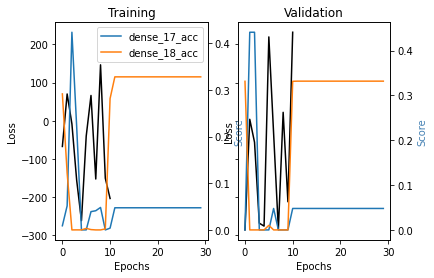

In [41]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
# This returns a tensor
inputs = Input(shape=(300,))
# A layer instance is callable on a tensor, and returns a tensor
xx = Dense(200, activation='tanh')(inputs)
# xx = Dense(200, activation='tanh')(xx)
outputs = Dense(300, activation='tanh')(xx)
outputs2 = Dense(300, activation='tanh')(xx)
# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=[outputs,outputs2])
print(model.summary())

# First configure model using model.compile()
# model.compile(
#     optimizer='rmsprop',
# #     loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     loss= 'sparse_categorical_crossentropy',#'categorical_crossentropy',
#     metrics=['accuracy']
# # )


#error logits: SparseCategoricalCrossentropy

model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=0.01,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"),metrics=['acc'])
# model.compile(    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
#     loss='categorical_crossentropy')

# dosnt work:
# model.compile(optimizer='adam',
#                       loss='cosine_proximity',
#                       metrics=['cosine_proximity'])
##keras embedding
# model.compile('rmsprop', 'mse')


# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=10000,
#     decay_rate=0.9)
# optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
# model.compile(optimizer=optimizer, loss=tf.keras.losses.CosineSimilarity(axis=1))
# model.compile(optimizer='sgd', loss=tf.keras.losses.CosineSimilarity(axis=1))

#mean_squared_logarithmic_error better loss

# model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adadelta(),metrics=['mean_absolute_error'])
# model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
# model.compile(optimizer=tf.keras.optimizers.Adam(), loss='cosine_proximity',metrics=['cosine_proximity']) #categorical_crossentropy



# Then, train the model with fit()
history = model.fit(x, [y1,y2],
                    batch_size= 1,
                    epochs= 30,
                    validation_split=0.2
                   )


keras.utils.plot_model(model, show_shapes=True)




print(model.summary(), x.shape, y1.shape)
# history = model.fit(x,y1, batch_size=32, epochs=50, validation_split=0.2)

deep_model=model

training = history
## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()


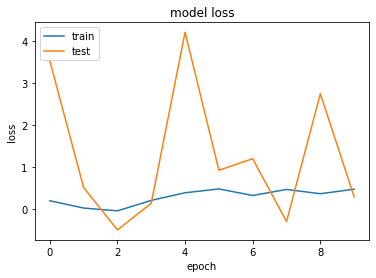

In [90]:
### categorical_crossentropy',optimizer='rmsprop'

# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



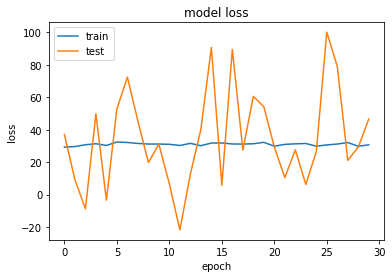

In [12]:
### categorical_crossentropy',optimizer='rmsprop'
## input w2v sum (QA)
# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



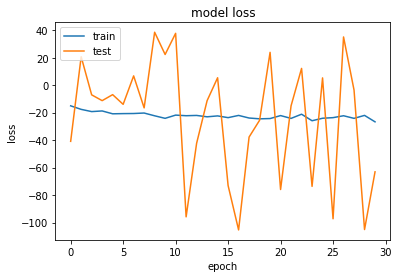

In [16]:
### categorical_crossentropy',optimizer='rmsprop'
## input w2v sum (QA)
# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



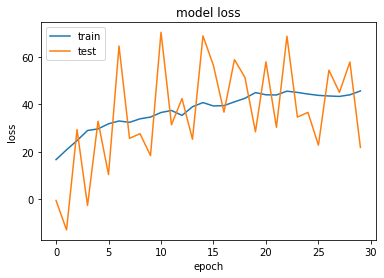

In [184]:
### categorical_crossentropy',optimizer='rmsprop'
##lr =1**-4
# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



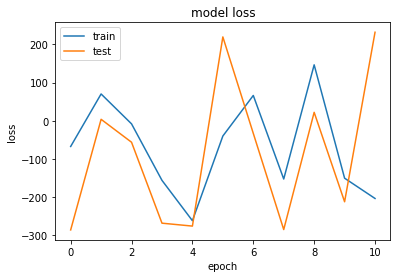

In [42]:
### categorical_crossentropy',optimizer='rmsprop'
##lr =1**-2
# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



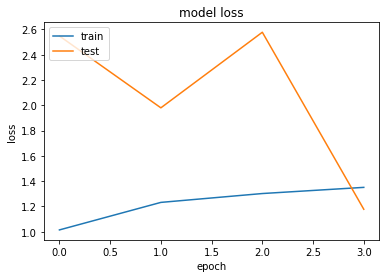

In [88]:
###  optimizer=keras.optimizers.Adam(learning_rate=1e-3),
#     loss='categorical_crossentropy',

# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



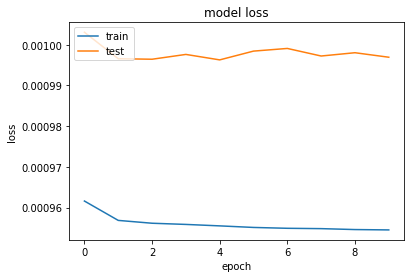

In [62]:
##keras embedding
# model.compile('rmsprop', 'mse')

# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



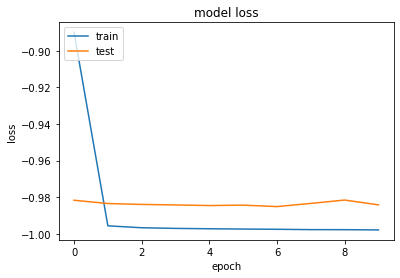

In [60]:
###model.compile(optimizer='sgd', loss=tf.keras.losses.CosineSimilarity(axis=1))


# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



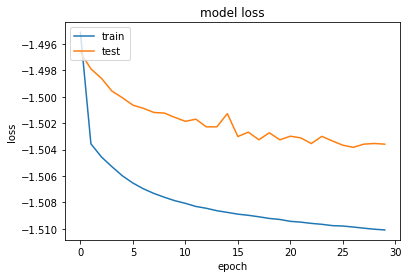

In [202]:
###model.compile(optimizer='sgd', loss=tf.keras.losses.CosineSimilarity(axis=1))
#input d2v (QA)

# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



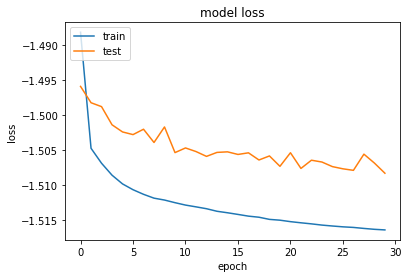

In [7]:
###model.compile(optimizer='sgd', loss=tf.keras.losses.CosineSimilarity(axis=1))
# input w2v sum (QA)

# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



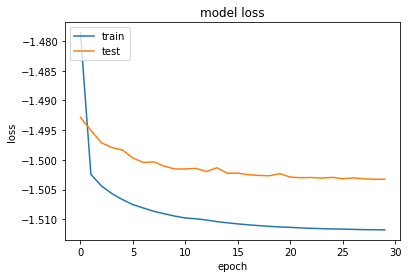

In [9]:
###optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
###model.compile(optimizer=, loss=tf.keras.losses.CosineSimilarity(axis=1))
##input w2v sum (QA)

# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [130]:
model.summary()

Model: "model_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_36 (InputLayer)           [(None, 300)]        0                                            
__________________________________________________________________________________________________
dense_100 (Dense)               (None, 200)          60200       input_36[0][0]                   
__________________________________________________________________________________________________
dense_101 (Dense)               (None, 200)          40200       dense_100[0][0]                  
__________________________________________________________________________________________________
dense_102 (Dense)               (None, 300)          60300       dense_101[0][0]                  
___________________________________________________________________________________________

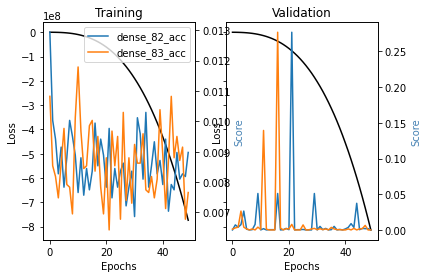

In [121]:
training = history
## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()


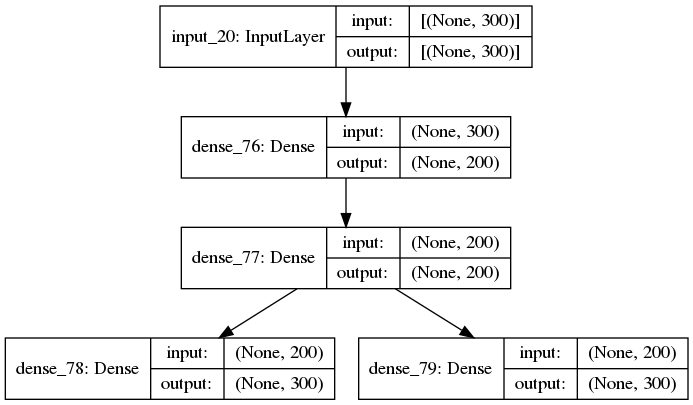

In [192]:
# print(type(x), x.shape)
# print(type(X_train), X_train.shape)
# print(X_train.shape, y_train.shape, type(X_train))
# # print( model.summary())
keras.utils.plot_model(deep_model, show_shapes=True)

## deep prediction

In [40]:
i = 178
text = df.iloc[i]['QA']

print(text)
print((preprocess_string((text), CUSTOM_FILTERS)))
print(df.iloc[i]['obj1'],"_________", df.iloc[i]['obj2'])
# test = np.array([d2v.infer_vector(row['obj1'].split())])
# test = np.array([w2v.wv['milk']])
# print(row['obj1'],test.shape, x.shape)
# print(d2v.infer_vector(row['QA'].split()).shape)
pred = deep_model.predict(np.array([d2v.infer_vector(preprocess_string((row['QA']), CUSTOM_FILTERS))]))
    
# pred = deep_model.predict(test)
# pred
w2v.wv.most_similar(pred[0]), w2v.wv.most_similar(pred[1]), len(pred), pred[0].shape

I should quit smoking because smoking causes slow and painful death.
['quit', 'smoking', 'smoking', 'causes', 'slow', 'painful', 'death']
throats with disgusting flesh _________ throats- flesh from smoking


([('specimen', 0.10622403770685196),
  ('carplane', 0.10333523899316788),
  ('chimpanzee', 0.10295481979846954),
  ('sfax', 0.09976204484701157),
  ('retain', 0.09703082591295242),
  ('rheumatologist', 0.09668824076652527),
  ('bulldozer', 0.09648209065198898),
  ('bullseyes', 0.09623982012271881),
  ('conjunctiva', 0.09595344215631485),
  ('thruster', 0.0959402322769165)],
 [('combustion', 0.1496029794216156),
  ('body', 0.11444913595914841),
  ('jury', 0.11393815279006958),
  ('ketchup', 0.11303785443305969),
  ('food', 0.11149583011865616),
  ('tomato', 0.1106378510594368),
  ('salad', 0.11004354804754257),
  ('heinz', 0.10125654935836792),
  ('chimpanzee', 0.10116349905729294),
  ('fomite', 0.10094443708658218)],
 2,
 (1, 300))

In [108]:
w2v.wv.most_similar('condom'), df.iloc[100]['obj1'],df.iloc[100]['obj2'], df.iloc[100]

([('fat', 0.993813693523407),
  ('almonds', 0.9932065010070801),
  ('miniature', 0.9923184514045715),
  ('elevator', 0.9917258024215698),
  ('placard', 0.9910252094268799),
  ('mirror', 0.9897026419639587),
  ('package', 0.9891471266746521),
  ('ear', 0.9888697862625122),
  ('markers', 0.9886146783828735),
  ('remote', 0.988601565361023)],
 'bottle',
 'forks- chocolate- food',
 Id                                                         13080.jpg
 QA                 I should watch what I eat because I order take...
 Atypical_Annot     Texture Replacement 2: The object which has a ...
 Aty                                      bottle forks chocolate food
 method                                         Texture Replacement 2
 obj1                                                          bottle
 obj2                                          forks- chocolate- food
 Atypical_Annot2    Texture Replacement 2: The object which has a ...
 Name: 100, dtype: object)

In [106]:
# w2v.wv.most_similar(negative=['smoke']),
word='bottle'
print(word)
keys = []
score = []
pop = []
for row in  w2v.wv.most_similar([word], topn=20):
    try:
        #normalized:
        pop.append(wv.key_to_index[row[0]]/3000000)
        keys.append(row[0])
        score.append(row[1])
    except:
#         pop.append(np.inf)
        pass

        
# for row in  w2v.wv.most_similar(negative=[word]):
#     keys.append(row[0])
#     score.append(row[1])
#     try:
#         pop.append(wv.key_to_index[row[0]])
#     except:
#         pop.append(np.inf)


concept = pd.DataFrame(data={'word':keys, 'sim_score':score, 'popularity':pop})
# weighted:
concept['score']=10*concept['sim_score']+ concept['popularity']
concept.sort_values('score',ascending=False)
# concept.sort_values('popularity',ascending=False)
# for key in w2v.wv.most_similar(['smoke']):
#     print(key[0])
#     break
# wv.key_to_index['cylinder']
# wv.key_to_index[key[0]]
# type(key[0])

bottle


,word,sim_score,popularity,score
0,lemon,0.967268,0.007635,9.680310
19,tetris,0.936119,0.279690,9.640878
1,bottles,0.963147,0.002318,9.633786
2,pool,0.960554,0.000944,9.606481
3,iv,0.956220,0.009613,9.571814
4,peel,0.954723,0.009496,9.556721
5,outline,0.954394,0.003643,9.547585
6,witch,0.948357,0.010461,9.494026
8,chalk,0.947262,0.007540,9.480157
7,glass,0.947875,0.001163,9.479918


In [91]:
wv.index_to_key[-1], wv.key_to_index['snowcapped_Caucasus']

('snowcapped_Caucasus', 2999999)

In [142]:
row['obj1'].split(), w2v.wv.most_similar(pred[0])

(['oreo'],
 [('flowerpot', 0.19020314514636993),
  ('orthography', 0.1822919100522995),
  ('decorate', 0.17923298478126526),
  ('buy', 0.1780838817358017),
  ('texture', 0.16654235124588013),
  ('mariticide', 0.16617600619792938),
  ('new', 0.16536450386047363),
  ('shotgun', 0.1637277603149414),
  ('grooming', 0.16175153851509094),
  ('pantyhose', 0.15541335940361023)])

In [119]:
d2v.docvecs.most_similar([inferred_vector], topn=len(d2v.docvecs))
# sims = d2v.docvecs.most_similar(pred[0], topn=(20))
# sims
# rank = [docid for docid, sim in sims]
# rank.index(doc_id)
# ranks.append(rank)

# second_ranks.append(sims[1])

# print(pred[0][0].shape)

/home/m_eslami/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  """Entry point for launching an IPython kernel.


[(1333, 0.9513474106788635),
 (12146, 0.9499232172966003),
 (21353, 0.94517982006073),
 (7878, 0.9444647431373596),
 (1990, 0.9439725875854492),
 (5379, 0.9427998065948486),
 (6209, 0.9410977959632874),
 (7362, 0.9401547908782959),
 (29660, 0.9400126934051514),
 (13214, 0.9388687014579773),
 (24430, 0.9386294484138489),
 (635, 0.9372766613960266),
 (9324, 0.9367477297782898),
 (1356, 0.9362114071846008),
 (14348, 0.9357532262802124),
 (1582, 0.9356186389923096),
 (3973, 0.9356054067611694),
 (7441, 0.9349181056022644),
 (11591, 0.9342453479766846),
 (15819, 0.933960497379303),
 (6456, 0.9338268041610718),
 (5971, 0.9337258338928223),
 (2017, 0.9335559606552124),
 (23337, 0.9332796335220337),
 (2010, 0.9332224726676941),
 (18240, 0.9329221248626709),
 (3027, 0.9328929781913757),
 (6350, 0.9325368404388428),
 (31112, 0.9323177933692932),
 (27493, 0.9318851828575134),
 (20701, 0.9315207600593567),
 (6416, 0.9313898682594299),
 (19088, 0.9310475587844849),
 (25660, 0.930531919002533),
 (27

In [131]:
test

['milk']

In [132]:
# test?

ranks = []
second_ranks = []
# for doc_id in range(len(train_corpus)):
for doc_id in [1,100,1000]:
    test =df.iloc[doc_id]['obj1'].split()
    print("input: ", test)
    inferred_vector = d2v.infer_vector(test)
    sims = d2v.docvecs.most_similar([inferred_vector], topn=len(d2v.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])
    break
    
    
import collections

counter = collections.Counter(ranks)
print(counter)

print('Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % d2v)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))
    
    
# # Pick a random document from the corpus and infer a vector from the model
# import random
# doc_id = random.randint(0, len(train_corpus) - 1)

# # Compare and print the second-most-similar document
# print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
# sim_id = second_ranks[doc_id]
# print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(train_corpus[sim_id[0]].words)))

input:  ['milk']
Counter({265: 1})
Document (1): «bag carrying groceries»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d100,n5,w5,t12):

MOST (7445, 0.8797537684440613): «drink paras milk paras milk good heart»

SECOND-MOST (4840, 0.8739532828330994): «object replacement object placed context object logo triangle shape object replaced object expected object woman s face»

MEDIAN (27926, 0.5402999520301819): «goon synonym lout»

LEAST (19251, -0.7127968668937683): «sweat shop formof sweatshop»



/home/m_eslami/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
w2v.

In [ ]:
# test?

ranks = []
second_ranks = []
# for doc_id in range(len(train_corpus)):
for doc_id in [1,100,1000]:
    test =df.iloc[doc_id]['obj1'].split()
    print("input: ", test)
    inferred_vector = d2v.infer_vector(test)
    sims = d2v.docvecs.most_similar([inferred_vector], topn=len(d2v.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])
    break
    
    
import collections

counter = collections.Counter(ranks)
print(counter)

print('Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % d2v)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))
    
    
# # Pick a random document from the corpus and infer a vector from the model
# import random
# doc_id = random.randint(0, len(train_corpus) - 1)

# # Compare and print the second-most-similar document
# print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
# sim_id = second_ranks[doc_id]
# print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(train_corpus[sim_id[0]].words)))

In [134]:
w2v.wv.most_similar(pred)

ValueError: shapes (15875,300) and (1,100) not aligned: 300 (dim 1) != 1 (dim 0)

## load data

In [145]:
#load data
df = pd.read_csv('aty.csv', index_col=0)
df = df.fillna('')
# sentences = [preprocess_string(remove_stopwords(row['QA'])) for ind,row in df.iterrows()]
# sentences += [preprocess_string(remove_stopwords(row['Atypical_Annot2'])) for ind,row in df.iterrows()]qa
qa = [preprocess_string(remove_stopwords(row['QA'])) for ind,row in df.iterrows()]
aty = [preprocess_string(remove_stopwords(row['Atypical_Annot2'])) for ind,row in df.iterrows()]
with open('concept_sentences.txt', 'r') as x:
    concept_sentences = [(preprocess_string(remove_stopwords(line.replace('\n','')))) for line in x.readlines()]

print(len(qa), len(aty), len(concept_sentences))
print(qa[0], aty[0], concept_sentences[0])

sentences = qa + aty + concept_sentences
print(len(sentences), type(sentences))
sentences = [list(t) for t in set(tuple(element) for element in sentences)]
print(len(sentences))

print((sentences[0], sentences[-1]))
random.shuffle(sentences)
print((sentences[0], sentences[-1]))



14207 14207 24159
['eat', 'oreo', 'snack', 'oreo', 'basketbal', 'game'] ['liquid', 'deform', 'object', 'liquid', 'deform', 'milk'] ['want', 'diminish', 'hunger', 'eat']
52573 <class 'list'>
32011
(['cinnamon', 'type', 'spice'], ['bui', 'baker', 'fruit', 'cake', 'baker', 'got', 'big', 'flavor'])
(['sea', 'relat', 'water', 'bodi'], ['hascontext', 'aviat'])


Model: "model_42"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_45 (InputLayer)           [(None, 300)]        0                                            
__________________________________________________________________________________________________
dense_136 (Dense)               (None, 200)          60200       input_45[0][0]                   
__________________________________________________________________________________________________
dense_137 (Dense)               (None, 200)          40200       dense_136[0][0]                  
__________________________________________________________________________________________________
dense_138 (Dense)               (None, 300)          60300       dense_137[0][0]                  
___________________________________________________________________________________________

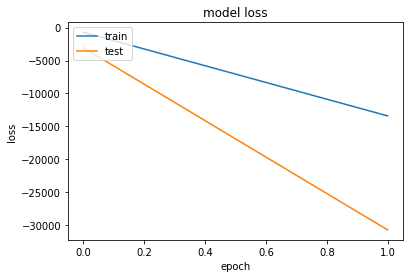

In [151]:

model = gensim.models.doc2vec.Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=1, sample = 0, workers=cores)
def get_corpus(sentences):
    docs=[]
    for i, sen in enumerate(sentences):
        docs.append(gensim.models.doc2vec.TaggedDocument(sen, [i]))
    return docs

def embedding_model(sentences,embedding, embedding_vec_size , mode ):
    if embedding=='w2v':
        model = Word2Vec(sentences, vector_size=embedding_vec_size , min_count=1, window=10, sg=mode)

        
    elif embedding=='d2v':
        train_corpus = get_corpus(sentences)#[:int(0.8*len(docs))])
        model = gensim.models.doc2vec.Doc2Vec(dm=mode, vector_size=embedding_vec_size, negative=5, hs=0, min_count=1, sample = 0, workers=cores)
        model.build_vocab(train_corpus)
        model.train(train_corpus, total_examples=d2v.corpus_count, epochs=d2v.epochs)

    return model

def experiment(
    sentences, embedding, embedding_vec_size, embedding_mode, 
    sentences2, embedding2, embedding_vec_size2, embedding_mode2
#     ,
#                loss, optimizer,metrics
              ):
    
    vecmodel_1 = embedding_model(sentences, embedding, embedding_vec_size, embedding_mode)
    vecmodel_2 = embedding_model(sentences2, embedding2, embedding_vec_size2, embedding_mode2)
    

    #input - output for dence model:
    y1 = []
    y2 = []
    x =[]

    for ind,row in df.iterrows():
        x.append((vecmodel_1.infer_vector(row['QA'].split())))
        y1.append(vecmodel_2.infer_vector(row['obj1'].split()))
        y2.append(vecmodel_2.infer_vector(row['obj2'].split()))

    x = np.array(x)
    y1 = np.array(y1)
    y2 = np.array(y2)
    


    inputs = Input(shape=x.shape[1:])
    # A layer instance is callable on a tensor, and returns a tensor
    xx = Dense(200, activation='relu')(inputs)
    xx = Dense(200, activation='relu')(xx)
    outputs = Dense(300, activation='softmax')(xx)
    outputs2 = Dense(300, activation='softmax')(xx)
    # This creates a model that includes
    # the Input layer and three Dense layers
    model = Model(inputs=inputs, outputs=[outputs,outputs2])
    print(model.summary())

    # First configure model using model.compile()
    # model.compile(
    #     optimizer='rmsprop',
    # #     loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    #     loss= 'sparse_categorical_crossentropy',#'categorical_crossentropy',
    #     metrics=['accuracy']
    # # )

    model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])
    # model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adadelta(),metrics=['mean_absolute_error'])
    # model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    # model.compile(optimizer=tf.keras.optimizers.Adam(), loss='cosine_proximity',metrics=['cosine_proximity']) #categorical_crossentropy



    # Then, train the model with fit()
    history = model.fit(x, [y1,y2],
    #                     batch_size= 1,
                        epochs= 2,
                        validation_split=0.2
                       )


    return history
    
    
history = experiment(
    sentences, 'd2v', 300, 0, 
    sentences, 'd2v', 300, 0,
#                loss, optimizer,metrics
              )


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# NER

In [7]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
NER = spacy.load("en_core_web_sm")

nlp = en_core_web_sm.load()

In [53]:
# doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
doc = nlp('mouse')
print([(X.text, X.label_) for X in doc.ents])

[('mouse', 'PERSON')]


In [18]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])


[(European, 'B', 'NORP'),
 (authorities, 'O', ''),
 (fined, 'O', ''),
 (Google, 'B', 'ORG'),
 (a, 'O', ''),
 (record, 'O', ''),
 ($, 'B', 'MONEY'),
 (5.1, 'I', 'MONEY'),
 (billion, 'I', 'MONEY'),
 (on, 'O', ''),
 (Wednesday, 'B', 'DATE'),
 (for, 'O', ''),
 (abusing, 'O', ''),
 (its, 'O', ''),
 (power, 'O', ''),
 (in, 'O', ''),
 (the, 'O', ''),
 (mobile, 'O', ''),
 (phone, 'O', ''),
 (market, 'O', ''),
 (and, 'O', ''),
 (ordered, 'O', ''),
 (the, 'O', ''),
 (company, 'O', ''),
 (to, 'O', ''),
 (alter, 'O', ''),
 (its, 'O', ''),
 (practices, 'O', '')]


# One-Shot-Learning

In [145]:
### create pairs + and -

# CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, strip_punctuation, remove_stopwords]
# qa = [(preprocess_string((row['QA']), CUSTOM_FILTERS)) for ind,row in df.iterrows()]

for ind,row in df.iterrows():
    print(preprocess_string((row['QA']), CUSTOM_FILTERS))
    break





['eat', 'oreos', 'snack', 'oreos', 'basketball', 'game']


In [119]:
import re
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
# from zeugma import TextsToSequences, Padder, ItemSelector

max_words_job_title = 10  # To avoid very long job titles we limit them to 10 words
vocab_size = 10000  # Number of most-frequent words kept in the vocabulary
# ....?
# /...?

# !pip3 install zeugma
from zeugma import EmbeddingTransformer

# We'll use the GloVe pre-trained embeddings, using the sum of the word embeddings
# of a job title as the embedding vector
embedding = EmbeddingTransformer('glove', aggregation='sum')

embedding_layer = embedding.get_keras_embedding()


AttributeError: 'EmbeddingTransformer' object has no attribute 'get_keras_embedding'

In [130]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda, Subtract, Embedding
from tensorflow.keras import backend as K

def exponent_neg_manhattan_distance(arms_difference):
    """ Compute the exponent of the opposite of the L1 norm of a vector, to get the left/right inputs
    similarity from the inputs differences. This function is used to turned the unbounded
    L1 distance to a similarity measure between 0 and 1"""
    return K.exp(-K.sum(K.abs(arms_difference), axis=1, keepdims=True))

def siamese_lstm(max_length, embedding_layer):
    """ Define, compile and return a siamese LSTM model """
    input_shape = (max_length,)
    left_input = Input(input_shape, name='left_input')
    right_input = Input(input_shape, name='right_input')

    # Define a single sequential model for both arms.
    # In this example I've chosen a simple bidirectional LSTM with no dropout
    seq = Sequential(name='sequential_network')
    seq.add(embedding_layer)
    seq.add(Bidirectional(LSTM(32, dropout=0., recurrent_dropout=0.)))
    
    left_output = seq(left_input)
    right_output = seq(right_input)

    # Here we subtract the neuron values of the last layer from the left arm 
    # with the corresponding values from the right arm
    subtracted = Subtract(name='pair_representations_difference')([left_output, right_output])
    malstm_distance = Lambda(exponent_neg_manhattan_distance, 
                             name='masltsm_distance')(subtracted)

    siamese_net = Model(inputs=[left_input, right_input], outputs=malstm_distance)
    siamese_net.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
    return siamese_net

siamese_lstm = siamese_lstm(max_words_job_title, Embedding)
# siamese_lstm = siamese_lstm(max_words_job_title, embedding_layer)

# Print a summary of the model mainly to know the number of trainable parameters
print(siamese_lstm.summary())

history = siamese_lstm.fit(x_pairs, y_pairs, validation_split=0.1, epochs=1);

TypeError: The added layer must be an instance of class Layer. Found: <class 'keras.layers.embeddings.Embedding'>

In [138]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(1000, 64, input_length=10))

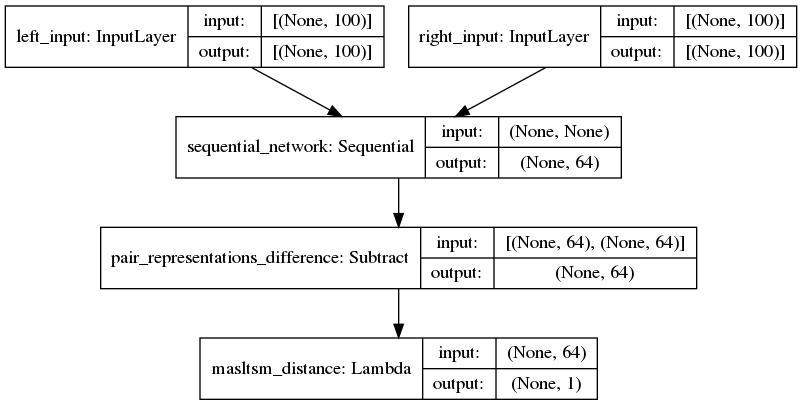

In [141]:
max_length=100
""" Define, compile and return a siamese LSTM model """
input_shape = (max_length,)
left_input = Input(input_shape, name='left_input')
right_input = Input(input_shape, name='right_input')

# Define a single sequential model for both arms.
# In this example I've chosen a simple bidirectional LSTM with no dropout
seq = Sequential(name='sequential_network')
seq.add(Embedding(100, 100))
seq.add(Bidirectional(LSTM(32, dropout=0., recurrent_dropout=0.)))

left_output = seq(left_input)
right_output = seq(right_input)

# Here we subtract the neuron values of the last layer from the left arm 
# with the corresponding values from the right arm
subtracted = Subtract(name='pair_representations_difference')([left_output, right_output])
malstm_distance = Lambda(exponent_neg_manhattan_distance, 
                         name='masltsm_distance')(subtracted)

siamese_net = Model(inputs=[left_input, right_input], outputs=malstm_distance)
siamese_net.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
keras.utils.plot_model(siamese_net, show_shapes=True)


## prediction

In [ ]:
x_references = pipeline.transform(x_train)  # Preprocess the training set examples

def get_prediction(job_title):
    """ Get the predicted job title category, and the most similar job title
    in the train set. Note that this way of computing a prediction is highly 
    not optimal, but it'll be sufficient for us now. """
    x = pipeline.transform([job_title])
    
    # Compute similarities of the job title with all job titles in the train set
    similarities = siamese_lstm.predict([[x[0]]*len(x_references), x_references])
    most_similar_index = np.argmax(similarities)
    
    # The predicted category is the one of the most similar example from the train set
    prediction = train_set['SOC minor group'].iloc[most_similar_index]
    most_similar_example = train_set['Reported Job Title'].iloc[most_similar_index]
    return prediction, most_similar_example



sample_idx = 1
pred, most_sim = get_prediction(x_test[sample_idx])

print(f'Sampled test job title: {x_test[sample_idx]}')
print(f'True occupation: {test_set["SOC minor group"].iloc[sample_idx]}')
print(f'Occupation prediction: {pred}')
print(f'Most similar example in train set: {most_sim}') 


from sklearn.metrics import accuracy_score

y_pred = [get_prediction(job_title)[0] for job_title in test_set['Reported Job Title']]
accuracy = accuracy_score(classes_encoder.transform(y_pred), y_test)

print(f'Test accuracy (siamese model): {100*accuracy:.2f} %')